# Circuit Fitting

Let's try to fit data from a circuit model

In [1]:
# using LsqFit, Plots, CSV, DataFrames
using EISAnalysis

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


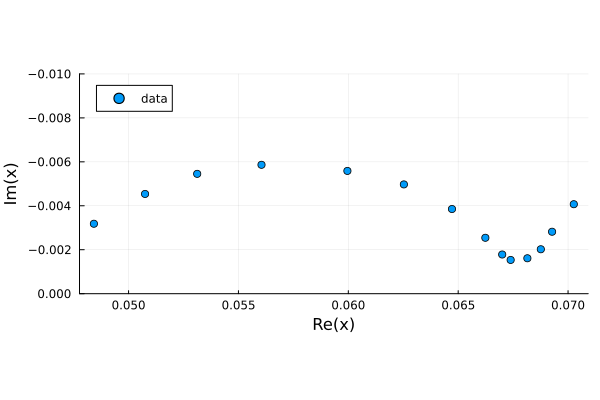

In [ ]:
#Here is some raw LiB EIS data from Mendeley Data
using CSV,DataFrames,Plots
omega_data =  [ 0.05, 0.1, 0.2, 0.4, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]
Zs = CSV.read("Data/EIS_Data.csv",DataFrame)
Z_data = Zs[!,"Re(Z)"]-im*Zs[!,"-Im(Z)"]
plt =scatter(Z_data,label = "data",aspect_ratio=:equal)
plot!(plt,ylims = (-0.01,0),yflip=true)

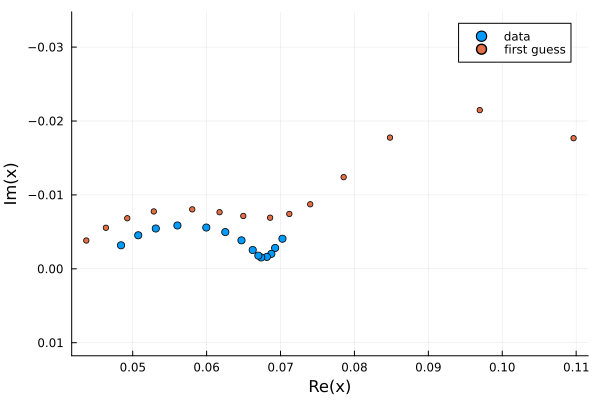

In [9]:
#let's fit with a randles circuit
randles_model(rs,rct,ws1,qdl) = rs-(rct-ws1)/qdl

R = r ~ omega_data
Ws = ws ~ omega_data
Q = q ~ omega_data

randles_model(p) = begin
    Rs,Rct,As,Bs,Qdl,Ndl = p
    randles_model(
        Rs*R,
        Rct*R,
        As*Ws^Bs,
        Qdl*Q^Ndl,
        )
end
p0 = [0.04,0.03,0.01,5,5,0.6]
circuit = randles_model(p0)

Z0 = circuit.Z
plt = scatter(Z_data,label = "data")
scatter!(plt,Z0,label = "first guess",yflip=true,markersize = 3,aspect_ratio=:equal)
plot!(plt)


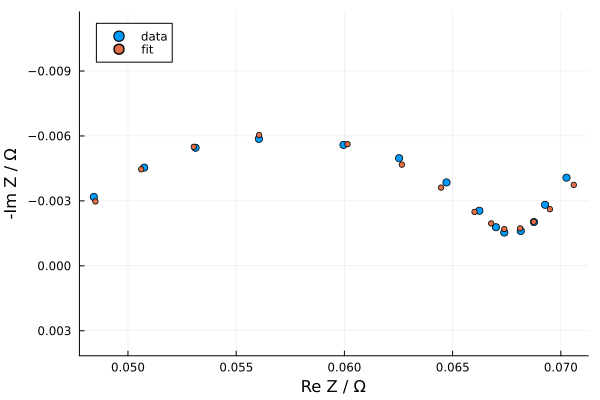

Parameters
__________
0.04599184626690507
0.02137034111407755
0.0010651791697412396
11.913416100804161
4.0896358958482315
0.6538620374414904


Dict{String, Vector{ComplexF64}} with 2 entries:
  "Z"          => [0.0705991-0.00373795im, 0.0694965-0.00261607im, 0.0687472-0.…
  "parameters" => [0.0459918+0.0im, 0.0213703+0.0im, 0.00106518+0.0im, 11.9134+…

In [10]:
#Let's try to fit
bounds = [
    (0.04,0.05)
    (0.015,0.03)
    (0.0,10000.0)
    (0.0,10000.0)
    (0.0,100)
    (0.2,1.0)
]
fit = fitted_circuit(randles_model,omega_data,Z_data,p0,bounds)